In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [5]:
x = boston.data[:, 5]
y = boston.target
x = np.transpose(np.atleast_2d(x))
lr.fit(x, y)
y_predicted = lr.predict(x)

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
mse = mean_squared_error(y, lr.predict(x))
print('Mean squared error (of training data): {:.3}'.format(mse))

Mean squared error (of training data): 43.6


In [8]:
rmse = np.sqrt(mse)
print(rmse)

6.60307138922


In [9]:
from sklearn.metrics import r2_score
r2 = r2_score(y, lr.predict(x))
print("R2 (on training data): {:.2}".format(r2))

R2 (on training data): 0.48


> All Columns

In [10]:
x = boston.data
y = boston.target
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

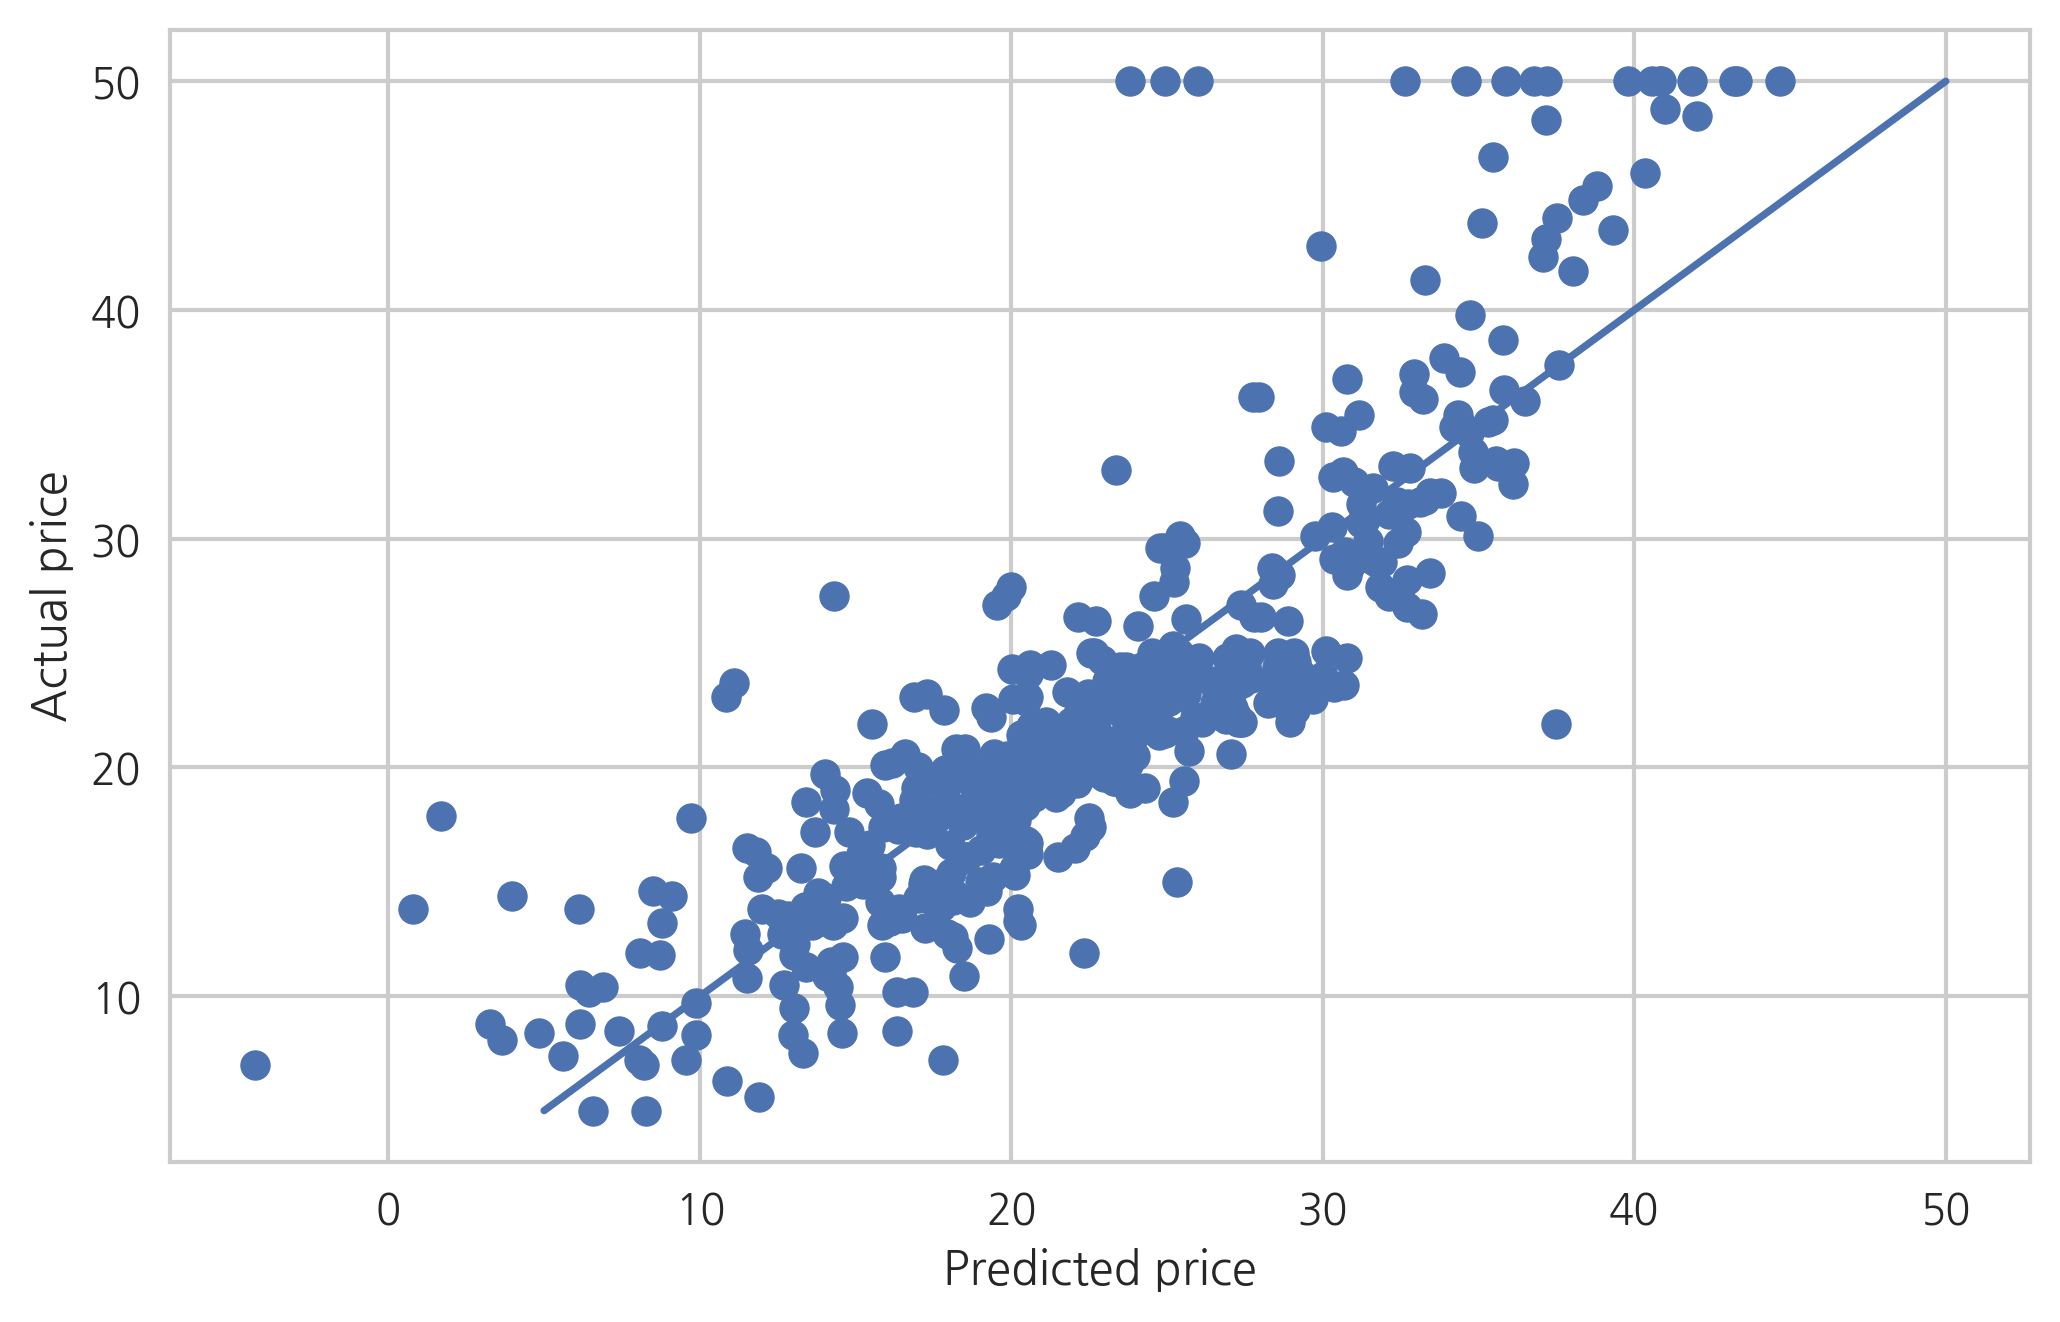

In [11]:
p = lr.predict(x)
plt.scatter(p, y)
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.plot([y.min(), y.max()], [[y.min()], [y.max()]])

## Cross - Validation

In [23]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
p = np.zeros_like(y)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr.fit(x_train, y_train)
    p[test_index] = lr.predict(x_test)

rmse_cv = np.sqrt(mean_squared_error(p[test_index], y[test_index]))
print('RMSE on 5-fold CV: {:.2}'.format(rmse_cv))

RMSE on 5-fold CV: 5.8


### Penalized or regularized regression

- This section introduces penalized regression, also called regularized regression, an important class of regression models.

- In ordinary regression, the returned fit is the best fit on the training data. This can lead to over-fitting. Penalizing means that we add a penalty for over-confidence in the parameter values. Thus, we accept a slightly worse fit in order to have a simpler model.

- Another way to think about it is to consider that the default is that there is no relationship between the input variables and the output prediction. When we have data, we change this opinion, but adding a penalty means that we require more data to convince us that this is a strong relationship.

### L1 and L2 penalties

- The problem, in general, is that we are given a matrix X of training data (rows are observations and each column is a different feature), and a vector y  of output values. The goal is to obtain a vector of weights, which we will call *b\**. The ordinary least squares regression is given by the following formula.

- Adding a penalty or a regularization means that we do not simply consider the best fit on the training data, but also how vector b is composed. There are two types of penalties that are typically used for regression by the sum of the absolute values of the coefficients, while an L2 penalty penalizes by the sum of squares.

#### Ridge, Lasso, and Elasticnets

- L1 : Rasso
- L2 : Ridge
- both : ElasticNet

- Both Lasso and Ridge result smaller coefficients than unpenalized regressioni. However, the Lasso has the additional property that it results in many coefficients being set to exactly zero! This means that the final model does not even use some of its input features, the model is **sparse**. This is often a very desirable property as the model performs both **feature selection and regression in a single step**.

- *a* control the degree of penalization. 0 is same as unpenalized.

### Lasso, Ridge, ElasticNet Comparison

In [30]:
from sklearn.datasets import load_boston
boston = load_boston()

In [31]:
x = boston.data
y = boston.target

In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [58]:
from sklearn.model_selection import KFold

# function for non-CV and CV trial
def non_cv_mse(model, x, y):
    model_fitted = model.fit(x, y)
    mse = mean_squared_error(y, model_fitted.predict(x))
    return mse


def cv_mse(model, x, y, n_splits=5):
    kf = KFold(n_splits=n_splits)
    p = np.zeros_like(y)
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(x_train, y_train)
        p[test_index] = model.predict(x_test)

    mse = mean_squared_error(p[test_index], y[test_index])
    return mse

> Lasso

In [61]:
model = Lasso()

non_cv_mse_result = non_cv_mse(model, x, y)
cv_mse_result = cv_mse(model, x, y)

print('Mean squared error (of training data): {:.3}'.format(non_cv_mse_result))
print('Mean squared error (of cross_validated): {:.3}'.format(cv_mse_result))

Mean squared error (of training data): 26.8
Mean squared error (of cross_validated): 19.3


> Ridge

In [62]:
model = Ridge()

non_cv_mse_result = non_cv_mse(model, x, y)
cv_mse_result = cv_mse(model, x, y)

print('Mean squared error (of training data): {:.3}'.format(non_cv_mse_result))
print('Mean squared error (of cross_validated): {:.3}'.format(cv_mse_result))

Mean squared error (of training data): 22.0
Mean squared error (of cross_validated): 31.4


> ElasticNet

In [59]:
model = ElasticNet(alpha=0.5)

non_cv_mse_result = non_cv_mse(model, x, y)
cv_mse_result = cv_mse(model, x, y)

print('Mean squared error (of training data): {:.3}'.format(non_cv_mse_result))
print('Mean squared error (of cross_validated): {:.3}'.format(cv_mse_result))

Mean squared error (of training data): 24.9
Mean squared error (of cross_validated): 21.0


## Visualizing the Lasso path

In [63]:
las = Lasso(normalize=1)
alphas = np.logspace(-5, 2, 1000)
alphas, coefs, _ = las.path(x, y, alphas=alphas)

(100.0, 1.0000000000000001e-05)

/home/dockeruser/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


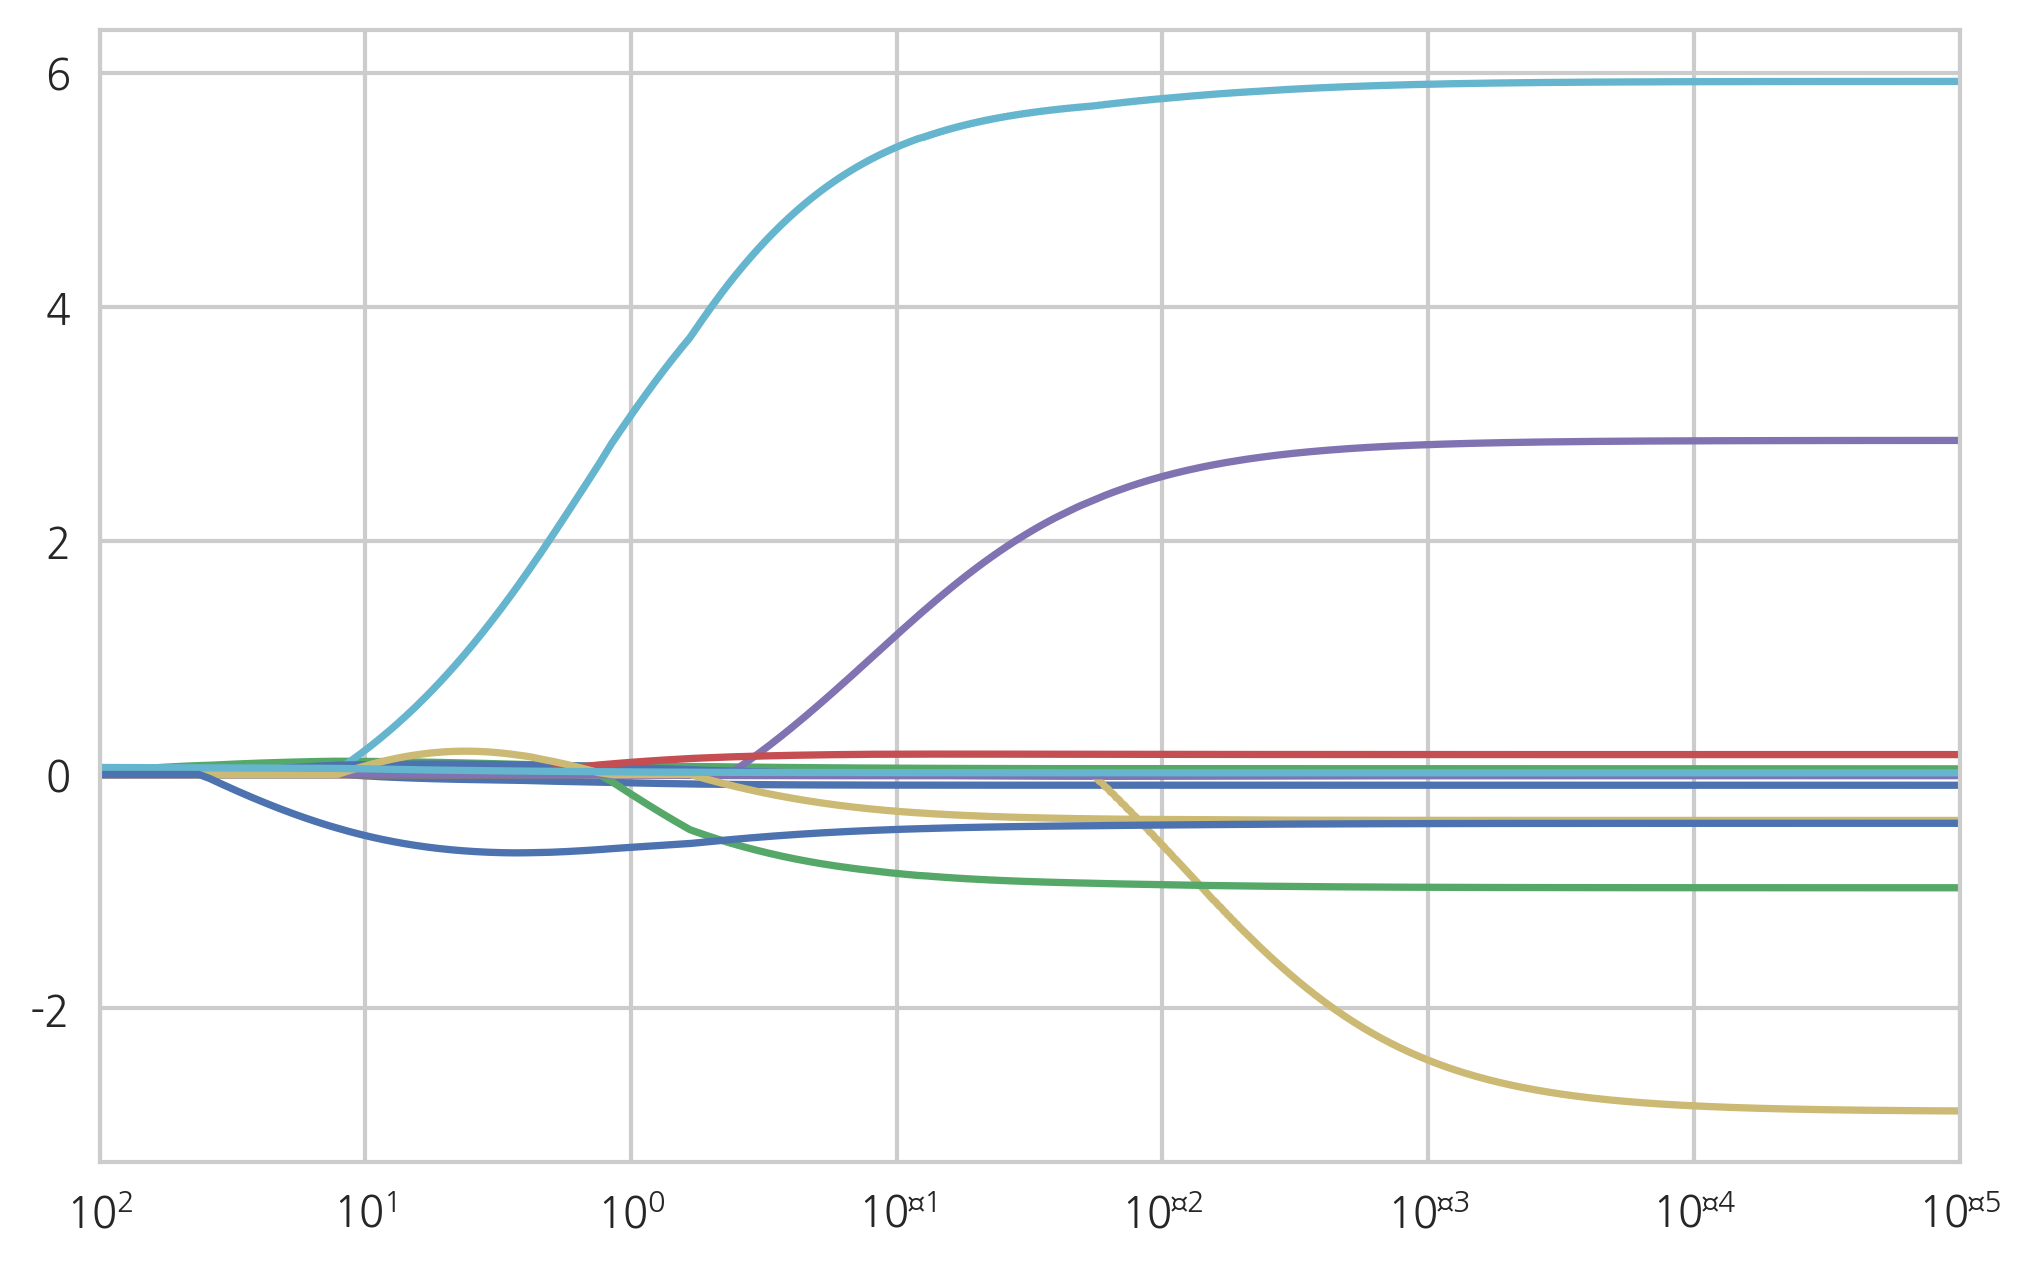

In [64]:
fig, ax = plt.subplots()
ax.plot(alphas, coefs.T)
ax.set_xscale('log')
ax.set_xlim(alphas.max(), alphas.min())

### P-greater-than-N scenarios

- The number of features, P, was greater than the number of examples, N."

- However, and this is a major problem, zero training error does not mean that your solution will generalize well. In fact, it may generalize very poorly. Whereas earlier regularization could give you a little extra boost, it is now absolutely required for  a meaningful result.

### An example based on text documents

- There are 16,087 examples available. The features, which have already been preprocessed for us, correspond to different words, 150,360 in total. Thus, we have many more features than examples, almost ten times as much. In the introduction, it was stated that ordinary least regression fails in these cases and we will now see why by attempting to blindly apply it. 

In [72]:
from sklearn.datasets import load_svmlight_file
data, target = load_svmlight_file('./data/E2006.train/E2006.train')

In [74]:
print('Min target value: {}'.format(target.min()))

Min target value: -7.89957807346873


In [75]:
print('Max target value: {}'.format(target.max()))

Max target value: -0.519409526940154


In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data, target)
pred = lr.predict(data)
rmse_train = np.sqrt(mean_squared_error(target, pred))

In [77]:
print(rmse_train)

0.00241785186992


In [78]:
data.shape

(16087, 150360)

In [79]:
target.shape

(16087,)

In [80]:
type(data)

scipy.sparse.csr.csr_matrix

In [81]:
print(r2_score(target, pred))

0.999985376789


> Training and generalization error

- The natural solution is to use regularization to counteract the overfitting.

In [82]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.1)

cv_mse(model, data, target)

0.17126438045127448

In [83]:
np.sqrt(0.171264380)

0.41384100811785196

### Setting hyperparameters in a principled way

- How do we choose a good value? This is a general problem in machine  learning: setting parameters for our learning methods. 

In [84]:
from sklearn.linear_model import ElasticNetCV
met = ElasticNetCV(n_jobs=2)

cv_mse(met, data, target)

KeyboardInterrupt: 

# Recommendations

- ensemble learnin

### Rating predictions and recommendations

### Spitting into training and testing

In [ ]:
def load():
    import numpy as np
    from scipy import sparse
    
    data = np.loadtxt('data/ml-100k/u.data')
    ij = data[:, 2]
    ij -= 1
    values = data[:, 2]
    reviews = sparse.csv_matrix((values, ij.T)).astype(float)
    return reviews.toarray()
    

In [ ]:
reviews = load()
U, M = np.where(reviews)

In [ ]:
import random
test_idxs = np.array(random.sample(range(len(U)), len(U)//10))
train = reviews.copy()
train[U[test_idxs], M[test_idxs]] = 0

In [ ]:
test = np.zeros_like(reviews)
test[U[test_idxs], M[test_idxs]] = reviews[U[test_idxs], M[test_idxs]]

## Normalizaing the training data

- conversion to z-scores

In [86]:
class NormailizePositive(object):
    def __init__(self, axis=0):
        self.axis = axis
        
    def fit(self, features, y=None):
        if self.axis == 1:
            features = features.T
        # count features tjat are greater than zero in axis 0:
        binary = (features > 0)
        count0 = binary.sum(axis=0)

        # to avoid division by zero, set zero counts to one:
        count0[count0 == 0] = 1.

        # computing the mean is easy:
        self.mean = features.sum(axis=0) / count0

        # only consider differences where binary is True:
        diff = (features - self.mean) * binary
        diff **= 2

        # regularize the estimate of std by adding 0.1
        self.std = np.sqrt(0.1 + diff.sum(axis=0)/count0)
        return self
    

# P. 200